# DATASET 2
 - *Abhishek Oli*
 - *E DBDA*
 - *001*


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
#pip install openpyxl

In [ ]:
#pip install xlrd

In [ ]:
df = pd.read_excel('/content/dataset_2.xlsx')

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#  Count of unique customers

In [ ]:
df['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [ ]:
df['CustomerID'].nunique()

4372

# Number of unique transactions / invoice no

In [ ]:
df['InvoiceNo'].unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [ ]:
df['InvoiceNo'].nunique()

25900

# 5 most frequent customers

In [ ]:
df['CustomerID'].groupby(df['InvoiceNo']).sum().head()

InvoiceNo
536365    124950.0
536366     35700.0
536367    156564.0
536368     52188.0
536369     13047.0
Name: CustomerID, dtype: float64

# Take time series of daily quantity of stock code = ‘10002’. Do the prediction of daily quantity for this product using ARIMA / LR with lag values

In [ ]:
X = df[df['StockCode'] == 10002]

In [ ]:
X.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098.0,United Kingdom
4272,536756,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-02 14:23:00,0.85,NaN,United Kingdom
5466,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03 11:19:00,0.85,17967.0,United Kingdom
5546,536865,10002,INFLATABLE POLITICAL GLOBE,5,2010-12-03 11:28:00,1.66,NaN,United Kingdom


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 31 to 171573
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    73 non-null     object        
 1   StockCode    73 non-null     object        
 2   Description  71 non-null     object        
 3   Quantity     73 non-null     int64         
 4   InvoiceDate  73 non-null     datetime64[ns]
 5   UnitPrice    73 non-null     float64       
 6   CustomerID   49 non-null     float64       
 7   Country      73 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.1+ KB


<AxesSubplot:>

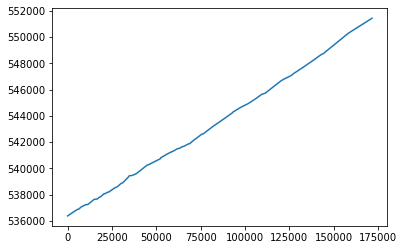

In [ ]:
X['InvoiceNo'].plot()

In [ ]:
X.sort_index(inplace=True)

In [ ]:
X.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098.0,United Kingdom
4272,536756,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-02 14:23:00,0.85,NaN,United Kingdom
5466,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03 11:19:00,0.85,17967.0,United Kingdom
5546,536865,10002,INFLATABLE POLITICAL GLOBE,5,2010-12-03 11:28:00,1.66,NaN,United Kingdom


In [ ]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
#Augmented Dickey–Fuller test
result = adfuller( X['InvoiceNo'].values, autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.0258308924504065
p-value: 1.0
Critial Values:
   1%, -3.540522678829176
Critial Values:
   5%, -2.9094272025108254
Critial Values:
   10%, -2.5923136524453696


In [ ]:
X['InvoiceNo_DeTending'] = X['InvoiceNo'] - X['InvoiceNo'].shift()

<ipython-input-37-4952e1808b7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['InvoiceNo_DeTending'] = X['InvoiceNo'] - X['InvoiceNo'].shift()


In [ ]:
X['InvoiceNo_DeTending'].head()

31      NaN
142      12
4272    374
5466    107
5546      2
Name: InvoiceNo_DeTending, dtype: object

In [ ]:
X['InvoiceNo_DeTending'].fillna(X['InvoiceNo_DeTending'].median(),inplace=True)

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<AxesSubplot:>

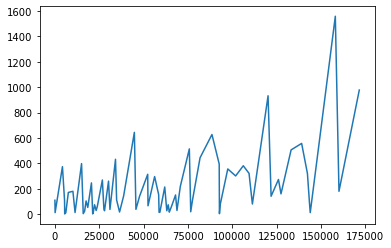

In [ ]:
X['InvoiceNo_DeTending'].plot()

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 4.9 MB/s 
     |████████████████████████████████| 9.5 MB 32.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima.model_selection import train_test_split
train, test = train_test_split(X['InvoiceNo_DeTending'], train_size=int(0.7 * X.shape[0]))

In [ ]:
#Apply Arima
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from sklearn.metrics import mean_squared_error
data=np.asarray(train)
test1 = np.asarray(test)
data
test1

array([ 444.,  627.,  395.,    4.,   73.,  356.,  301.,  381.,  321.,
         80.,  932.,  141.,  273.,  160.,  506.,  557.,  320.,   96.,
         12., 1558.,  180.,  977.])

In [ ]:
model_arima = ARIMA(data,order=(1,0,0))


C:\Users\prate\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:

train_size = int(0.70* X.shape[0])
test_size = df.shape[0] - train_size

In [ ]:
model_arima_fit= model_arima.fit()
predict = model_arima_fit.forecast(test_size)
predict

(array([130.33487165, 126.54171533, 127.13296706, ..., 127.05323483,
        127.05323483, 127.05323483]),
 array([142.71809203, 144.44146055, 144.48307655, ..., 144.4841127 ,
        144.4841127 , 144.4841127 ]),
 array([[-149.38744868,  410.05719197],
        [-156.55834521,  409.64177588],
        [-156.04865935,  410.31459347],
        ...,
        [-156.13042239,  410.23689206],
        [-156.13042239,  410.23689206],
        [-156.13042239,  410.23689206]]))

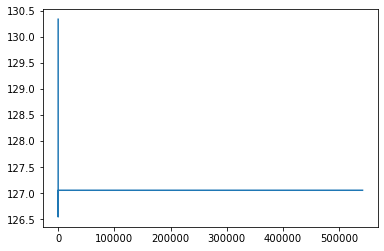

In [ ]:
plt.plot(range(predict[0].shape[0]),predict[0])

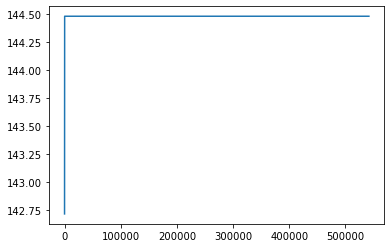

In [ ]:
plt.plot(range(predict[1].shape[0]),predict[1])

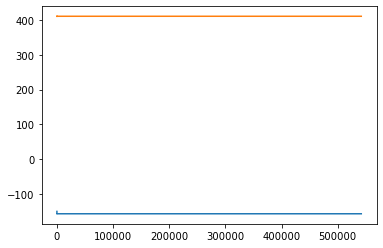

In [ ]:
plt.plot(range(predict[2].shape[0]),predict[2])